In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

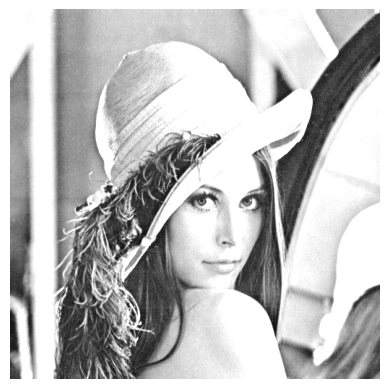

In [24]:
# opencv 를 이용해서 이미지 데이터를 읽으면
# numpy 의 ndarray 형식으로 데이터를 가져옴
# 흑백은 2차원, 컬러는 3차원
image = cv2.imread('./python_opencv-main/data/lena.jpg', cv2.IMREAD_GRAYSCALE)
#print(image)
    
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 합성을 위해 이미지 생성
sub_image = np.zeros(shape = (512, 512), dtype = np.uint8) + 100

# 이미지 합성을 위해 덧셈
# 덧셈을 하면 overflow가 발생할 가능성이 있음
#dst = image + sub_image
# 이미지의 색상은 0 ~ 255 사이의 값이어야 하는데 덧셈을 하면 
# 256 이사으이 값은 256으로 나눈 나머지 값을 가지게 됨

# opencv 함수를 이용해서 더하기 연산을 수행하면 
# 256 이상의 값은 모두 255로 설정됨
dst = cv2.add(image, sub_image)

plt.imshow(dst, cmap = 'gray') 
plt.axis('off')
plt.show()

13.0 107.0
2.7127659574468086
0.0 255.0


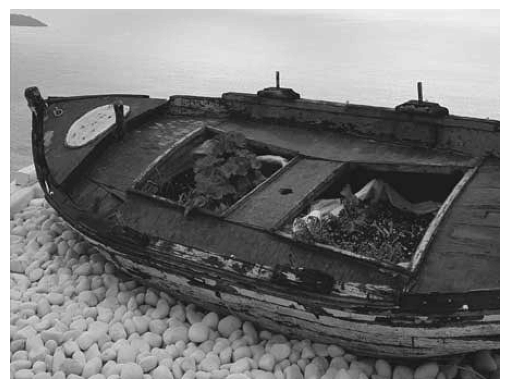

In [31]:
# 전체적인 색이 유사한 샘플 이미지 데이터 가져오기
image = cv2.imread('./python_opencv-main/data/minMax.jpg', cv2.IMREAD_GRAYSCALE)

# 최대값, 최소값 찾기 - minMaxLoc 함수 사용
(min_val, max_val, _, _) = cv2.minMaxLoc(image)
print(min_val, max_val) # 13.0, 107.0

ratio = 255 / (max_val - min_val)
print(ratio)

# min, max 를 통해 이미지를 정규화 - 뚜렷하게 보이도록
# 여기처럼 값이나 값의 차이를 크게 만드는 정규화를 진행하기도 함
result = np.round((image - min_val) * ratio).astype('uint8')

# 최소와 최대가 0, 255가 됨
# 최소와 최대 사이의 격차를 극대화해서 차이를 뚜렷하게 나타나도록 만듦
(min_val, max_val, _, _) = cv2.minMaxLoc(result)
print(min_val, max_val) # 0.0, 255.0

plt.imshow(result, cmap = 'gray') 
plt.axis('off')
plt.show()